In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # To save the model

# Load the dataset (if not already in memory)
file_path = "data/featured_clinvar_result.csv"
df = pd.read_csv(file_path)

# Define features (X) and target (y)
X = df.drop(columns=["label"])
y = df["label"]


In [19]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Train-Test Split Done: {X_train.shape[0]} Train Samples, {X_test.shape[0]} Test Samples")


✅ Train-Test Split Done: 972 Train Samples, 243 Test Samples


In [20]:
# Define Random Forest Classifier
import time
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")
start_time = time.time()

# Initialize k-fold cross-validation
# Train the model
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time
print("✅ Random Forest Model Trained Successfully!")
print(f"Random Forest Training Time: {rf_training_time:.4f} seconds")

✅ Random Forest Model Trained Successfully!
Random Forest Training Time: 0.3131 seconds


In [21]:
# Make predictions
start_time = time.time()
y_pred = rf_model.predict(X_test)
rf_inference_time = time.time() - start_time
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {accuracy:.4f}")

# Classification Report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Random Forest Inference Time: {rf_inference_time:.4f} seconds")

✅ Random Forest Accuracy: 0.9506

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       126
           1       0.94      0.96      0.95       117

    accuracy                           0.95       243
   macro avg       0.95      0.95      0.95       243
weighted avg       0.95      0.95      0.95       243


🔍 Confusion Matrix:
[[119   7]
 [  5 112]]
Random Forest Inference Time: 0.0124 seconds


In [22]:
# Save trained Random Forest model
model_path = "models/random_forest_model.pkl"
joblib.dump(rf_model, model_path)

print(f"✅ Model Saved at: {model_path}")


✅ Model Saved at: models/random_forest_model.pkl


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort by importance
feature_imp_df = feature_imp_df.sort_values(by="Importance", ascending=False)

# Display top 10 features
print("🔍 Top 10 Most Important Features:")
print(feature_imp_df.head(15))


🔍 Top 10 Most Important Features:
                   Feature  Importance
13                    type    0.259779
3    mc_synonymous_variant    0.171347
0               Unnamed: 0    0.106096
1                 position    0.089899
12         splice_distance    0.066812
10     mc_missense_variant    0.063608
8              mc_nonsense    0.063299
2          alignment_score    0.063294
9        mc_intron_variant    0.019911
4   mc_3_prime_UTR_variant    0.018969
5   mc_5_prime_UTR_variant    0.017505
20                  next_G    0.010859
21                  next_T    0.008513
16                  prev_G    0.007299
15                  prev_C    0.006925


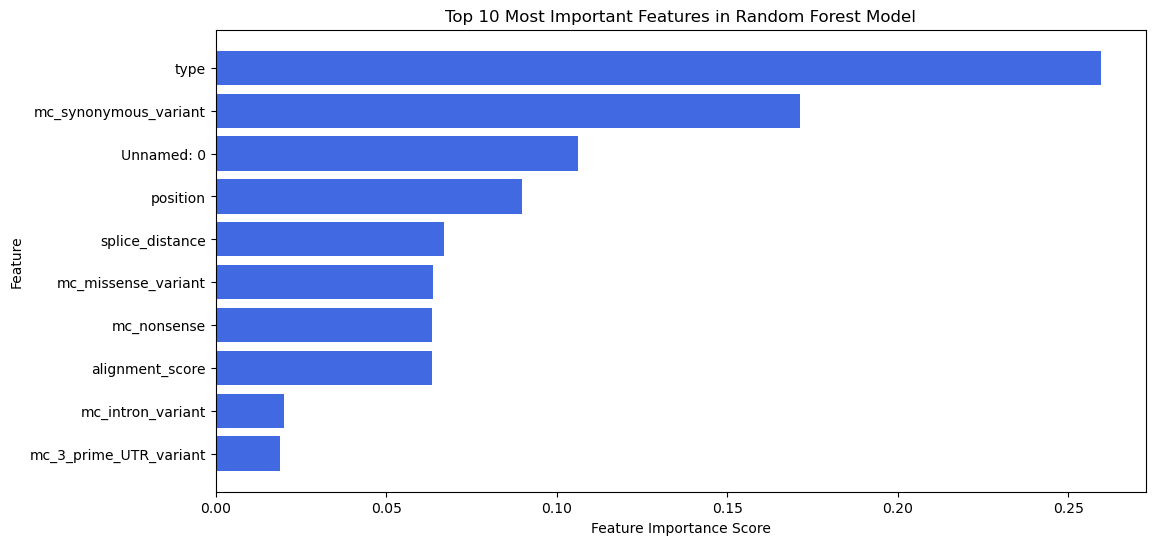

In [24]:
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_imp_df["Feature"][:10], feature_imp_df["Importance"][:10], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features in Random Forest Model")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define k for k-fold cross-validation
k = 5  # Change as needed

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")
start_time = time.time()
rf_training_time = time.time() - start_time
# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Cross-validation accuracy scores: [0.95061728 0.9382716  0.96296296 0.94238683 0.93004115]
Mean accuracy: 0.9449
Standard deviation: 0.0112
